In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
train_path='/content/drive/MyDrive/Training'
test_path='/content/drive/MyDrive/Testing'
val_path='/content/drive/MyDrive/Valid'

In [5]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):
 
        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)
       
        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [6]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 1600 images belonging to 10 classes.
Found 91 images belonging to 10 classes.
Found 105 images belonging to 10 classes.


In [9]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [10]:
from tensorflow.keras.applications import VGG19
import tensorflow as tf
tf.keras.applications.vgg19.preprocess_input

<function keras.applications.vgg19.preprocess_input>

In [11]:
IMAGE_SIZE= [224, 224]

In [12]:
vgg = VGG19(input_shape=IMAGE_SIZE +[3] , weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [13]:
for layer in vgg.layers:
    layer.trainable = False

In [14]:
x = Flatten()(vgg.output)
prediction = Dense(10, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [18]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=20,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/20
50/50 [==============================] - 952s 19s/step - loss: 2.1088 - accuracy: 0.3594 - val_loss: 1.8707 - val_accuracy: 0.3143
Epoch 2/20
50/50 [==============================] - 945s 19s/step - loss: 0.5197 - accuracy: 0.8869 - val_loss: 1.4770 - val_accuracy: 0.6476
Epoch 3/20
50/50 [==============================] - 943s 19s/step - loss: 0.2042 - accuracy: 0.9881 - val_loss: 1.4766 - val_accuracy: 0.6286
Epoch 4/20
50/50 [==============================] - 942s 19s/step - loss: 0.1151 - accuracy: 0.9962 - val_loss: 1.3097 - val_accuracy: 0.6762
Epoch 5/20
50/50 [==============================] - 938s 19s/step - loss: 0.0735 - accuracy: 1.0000 - val_loss: 1.3554 - val_accuracy: 0.6476
Epoch 6/20
50/50 [==============================] - 940s 19s/step - loss: 0.0524 - accuracy: 1.0000 - val_loss: 1.3520 - val_accuracy: 0.6286
Epoch 7/20
50/50 [==============================] - 936s 19s/step - loss: 0.0400 - accuracy: 1.0000 - val_loss: 1.3867 - val_accuracy: 0.6476
Epoch 

In [ ]:
model.evaluate(test_x,test_y,batch_size=32)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
accuracy_score(y_pred,test_y)

In [ ]:
print(classification_report(y_pred,test_y))

In [ ]:
confusion_matrix(y_pred,test_y)

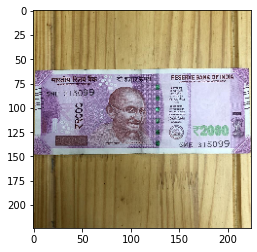

100New


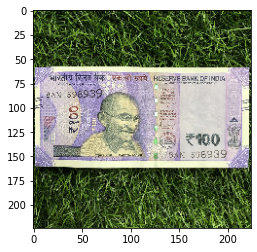

2000


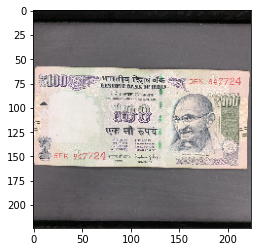

1ooOld


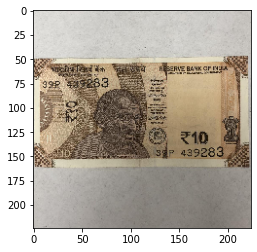

500


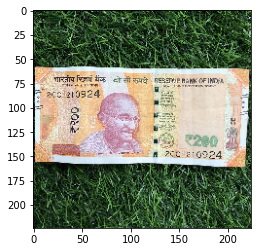

2000


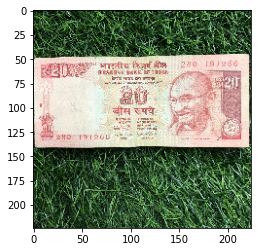

100New


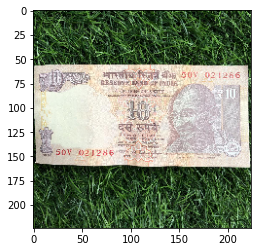

2000


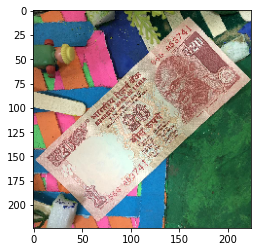

20


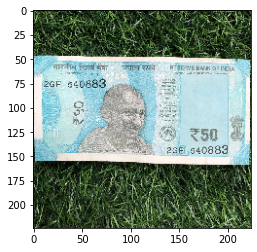

20


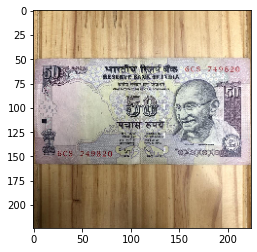

1ooOld


In [19]:
path='/content/drive/MyDrive/Final'
for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][0]>0.5:
        print("100New")
    elif pred[0][1]>0.5:
        print("1ooOld")
    elif pred[0][2]>0.5:
        print("10New")
    elif pred[0][3]>0.5:
        print("1oOld")
    elif pred[0][4]>0.5:
        print("20")
    elif pred[0][5]>0.5:
        print("2oo")
    elif pred[0][6]>0.5:
        print("2000")
    elif pred[0][7]>0.5:
        print("500")
    elif pred[0][8]>0.5:
        print("50New")
    elif pred[0][9]>0.5:
        print("50Old")
    else:
        print("Not matching")


In [20]:
model.save('vg19run1.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/vg19run1.h5')

In [ ]:
loaded_model.fit(train_x, train_y, epochs = 7, validation_data = (val_x,val_y),verbose=1)